# QUIMB bosonic results plot

In [2]:
import pickle
import matplotlib
import matplotlib.pyplot as plt

In [29]:
import numpy as np

# Load data

In [5]:
with open(r'data/bosonic_results/ed_b_params.pkl', 'rb') as f:
    ed_b_params = pickle.load(f)

In [6]:
with open(r'data/bosonic_results/quimb_ed_overlaps_dict.pkl', 'rb') as f:
    ed_overlaps_dict = pickle.load(f)

In [7]:
with open(r'data/bosonic_results/quimb_ed_mean_gauge_invariant_proj_rep_angle.pkl', 'rb') as f:
    ed_mean_gauge_invariant_proj_rep_angle = pickle.load(f)
with open(r'data/bosonic_results/quimb_ed_error_gauge_invariant_proj_rep_angle.pkl', 'rb') as f:
    ed_error_gauge_invariant_proj_rep_angle = pickle.load(f)

In [8]:
with open(r'data/bosonic_results/quimb_ed_optimisation_scores.pkl', 'rb') as f:
    ed_scores = pickle.load(f)

In [16]:
with open(r'data/bosonic_results/b_params.pkl', 'rb') as f:
    mps_b_params = pickle.load(f)

In [10]:
with open(r'data/bosonic_results/quimb_overlaps_dict.pkl', 'rb') as f:
    mps_overlaps_dict = pickle.load(f)

In [11]:
with open(r'data/bosonic_results/quimb_mean_gauge_invariant_proj_rep_angle.pkl', 'rb') as f:
    mps_mean_gauge_invariant_proj_rep_angle = pickle.load(f)
with open(r'data/bosonic_results/quimb_error_gauge_invariant_proj_rep_angle.pkl', 'rb') as f:
    mps_error_gauge_invariant_proj_rep_angle = pickle.load(f)

In [12]:
with open(r'data/bosonic_results/quimb_optimisation_scores.pkl', 'rb') as f:
    mps_scores = pickle.load(f)

# Plot

In [13]:
colors = [
    'tab:blue',
    'tab:orange',
    'tab:green'
]

symmetry_labels = [
    'II',
    'IX',
    'XI',
    'XX'
]

/Users/kierancooney/.pyenv/versions/num_spt_venv_p11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/kierancooney/.pyenv/versions/num_spt_venv_p11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


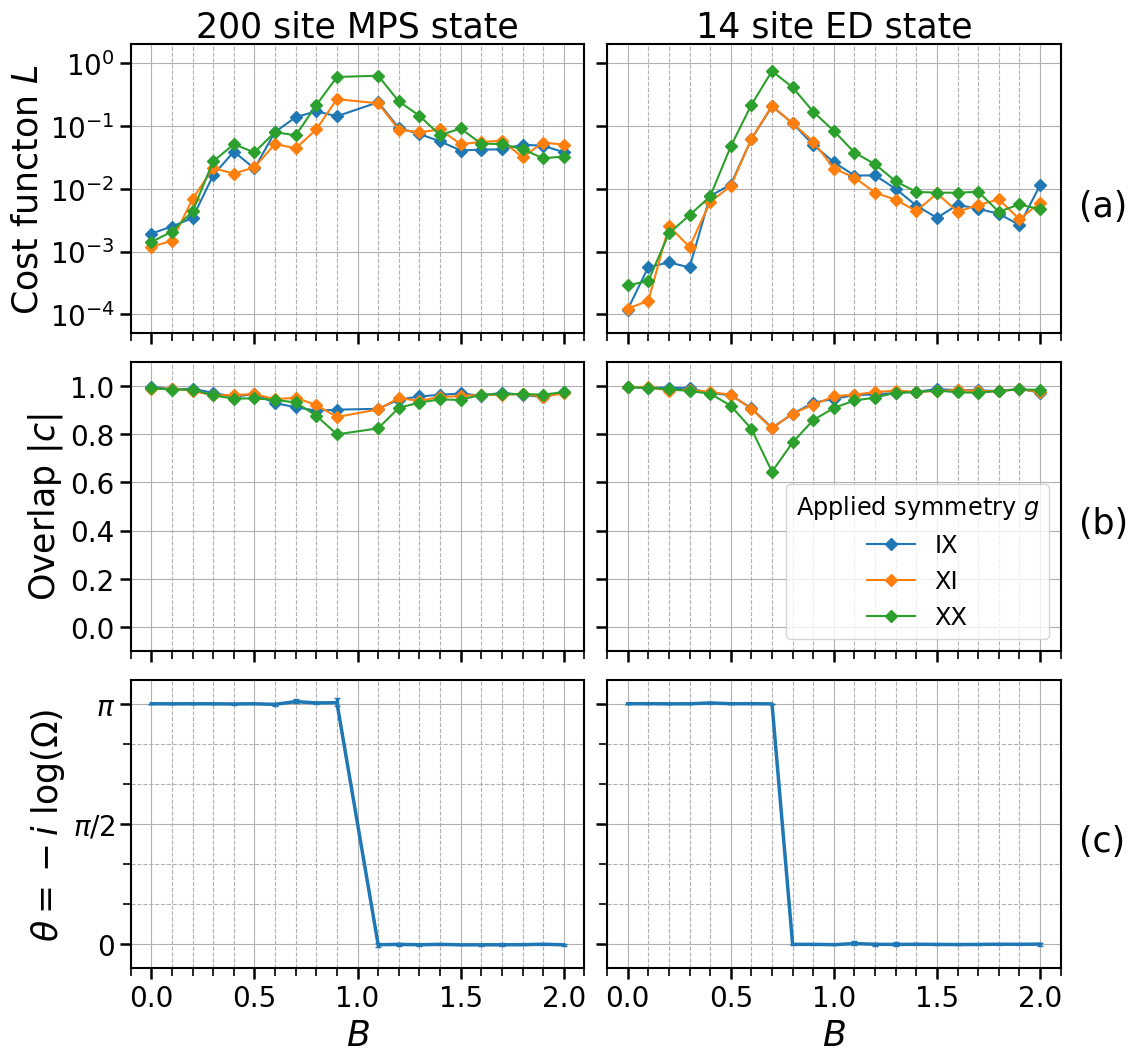

In [98]:
figure_label_fontsize=25
y_tick_label_fontsize=20
y_label_fontsize=25
x_tick_label_fontsize=20
x_label_fontsize=25
row_label_fontsize=25

axis_spine_linewidth = 1.5

major_tick_length = 8
major_tick_width = 1.8
minor_tick_length = 6
minor_tick_width = 1.2

phase_linewidth = 2.5

fig, ax_grid = plt.subplots(figsize=(12, 12), ncols=2, nrows=3)

for j, (col, label) in enumerate(zip(colors, symmetry_labels[1:])):
    ax_grid[0][0].plot(
        mps_b_params,
        mps_scores[:, j],
        color=col,
        label = label,
        marker='D'
    )

    ax_grid[0][1].plot(
        ed_b_params,
        ed_scores[:, j],
        color=col,
        label = label,
        marker='D'
    )

    ax_grid[1][0].plot(
        mps_b_params,
        [mps_overlaps_dict[(b, j+1)] for b in mps_b_params],
        color=col,
        label=label,
        marker='D'
    )

    ax_grid[1][1].plot(
        ed_b_params,
        [ed_overlaps_dict[(b, j+1)] for b in ed_b_params],
        color=col,
        label=label,
        marker='D'
    )

ax_grid[2][0].errorbar(
    mps_b_params,
    mps_mean_gauge_invariant_proj_rep_angle,
    yerr=mps_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)

ax_grid[2][1].errorbar(
    ed_b_params,
    ed_mean_gauge_invariant_proj_rep_angle,
    yerr=ed_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)

ax_grid[0][0].set_ylim(5e-5, 2)
ax_grid[0][1].set_ylim(5e-5, 2)

ax_grid[0][0].set_yscale('log')
ax_grid[0][1].set_yscale('log')

ax_grid[1][0].set_ylim(-0.1, 1.1)
ax_grid[1][1].set_ylim(-0.1, 1.1)
ax_grid[2][0].set_ylim((-0.1)*np.pi, np.pi*(1.1))
ax_grid[2][1].set_ylim((-0.1)*np.pi, np.pi*(1.1))


for i, ax_row in enumerate(ax_grid):
    for j, ax in enumerate(ax_row):
        ax.xaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(0.5)
        )
        ax.xaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(0.1)
        )

        #ax.grid()

        ax.grid(
            which='major',
            axis='both',
            zorder=-1e10
        )
        
        ax.grid(
            which='minor',
            axis='both',
            linestyle='--',
            zorder=-1e10
        )

        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(axis_spine_linewidth)

        ax.tick_params(
            axis='both',
            which='major',
            length=major_tick_length,
            width=major_tick_width
        )

        ax.tick_params(
            axis='both',
            which='minor',
            length=minor_tick_length,
            width=minor_tick_width
        )

        if i == 0:
            if j == 0:
                ax.title.set_text(rf'200 site MPS state')
            elif j == 1:
                ax.title.set_text(rf'14 site ED state')
            ax.title.set_fontsize(figure_label_fontsize)

            ax.yaxis.set_major_locator(
                matplotlib.ticker.LogLocator()
            )
            ax.yaxis.set_minor_locator(
                matplotlib.ticker.LogLocator(subs=(-1.0,))
            )

        if i == 1:
            ax.yaxis.set_major_locator(
                matplotlib.ticker.MultipleLocator(0.2)
            )

        if i == 2:
            ax.set_yticks(
                np.linspace(0, np.pi, 3),
                labels=['$0$', '$\pi/2$', '$\pi$']
            )
            
            ax.set_yticks(
                [np.pi/6, np.pi/3, 2*np.pi/3, 5*np.pi/6],
                minor=True
            )

            ax.set_xlabel('$B$', fontsize=x_label_fontsize)

            ax.tick_params(
                axis='x',
                which='major',
                labelsize=x_tick_label_fontsize
            )
        """
            ax.grid(
                which='minor',
                axis='y',
                linestyle='--',
                zorder=-1e10
            )
        """
        if j == 0:
            ax.tick_params(
                axis='y',
                which='major',
                labelsize=y_tick_label_fontsize
            )

        if j == 1:
            ax.set_yticklabels([])
            ax.yaxis.set_label_position("right")
        if i!= 2:
            ax.set_xticklabels([])

ax_grid[0][0].set_ylabel(r'Cost functon $L$', fontsize=y_label_fontsize)
ax_grid[1][0].set_ylabel(r'Overlap $\vert c \vert$', fontsize=y_label_fontsize)
ax_grid[2][0].set_ylabel(r'$\theta=-i\ \log(\Omega)$', fontsize=y_label_fontsize)

for i, l in enumerate('abc'):
    ax_grid[i][1].set_ylabel(
        f'({l})',
        fontsize=row_label_fontsize,
        rotation='horizontal',
        ha='left',
        labelpad=13
    )

ax_grid[1][1].legend(
    loc='lower right',
    title='Applied symmetry $g$',
    fontsize='xx-large',
    title_fontsize='xx-large'
)

fig.subplots_adjust(wspace=0.05, hspace=0.1)

fig.savefig(
    r'plots/mpo_bosonic_results.png',
    dpi=200,
    bbox_inches='tight'
)